# Task # 3 - To Explore Unsupervised Machine Learning

##### In this task we used Iris data and predicted the optimum number of cluster by using K-Means Clustering that is an unsupervised machine learning algorithm.

In [76]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns

# Load the iris dataset
data=pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Exploratory Data Analysis (EDA)

In [77]:
#find columns of dataframe
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [78]:
#Display the data types of each column using the attribute dtype
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [79]:
#the method value_counts to count the number of species with unique species values.
#to_frame() to convert it to a dataframe.
data.Species.value_counts().to_frame()

,Species
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [80]:
#find the summary of dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# Visualizing data using different plots

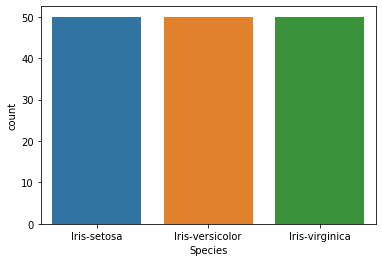

In [81]:
#it show the count of each categprical data
sns.countplot('Species',data=data)

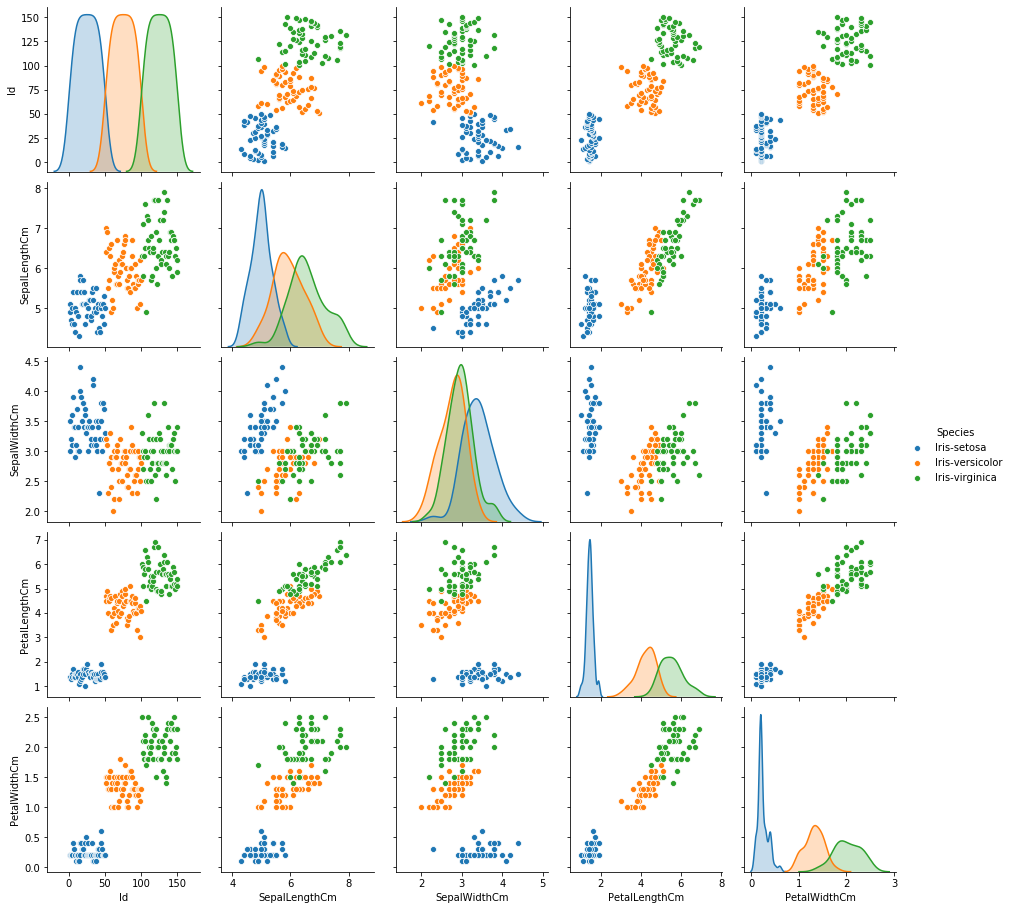

In [82]:
#A pairplot plot a pairwise relationships with other columns in datafeamw and also plot pairplot with itself .
sns.pairplot(data,hue='Species')

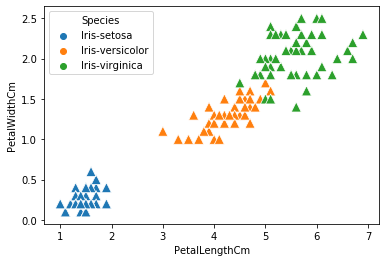

In [83]:
sns.scatterplot(x=data['PetalLengthCm'],y=data['PetalWidthCm'],hue=data['Species'],marker='^',s = 100)
#it shows
#if petal_length is less that ~2 and petal_width is less than ~0.6 then species ia 'setosa'
#if petal_length is between ~3 and ~5.2 and petal_width is between ~1.0 and ~1.7 then species ia 'versicolor'
#if petal_length is greater that ~5.2 and petal_width is greater than ~1.7 then species ia 'virginica'

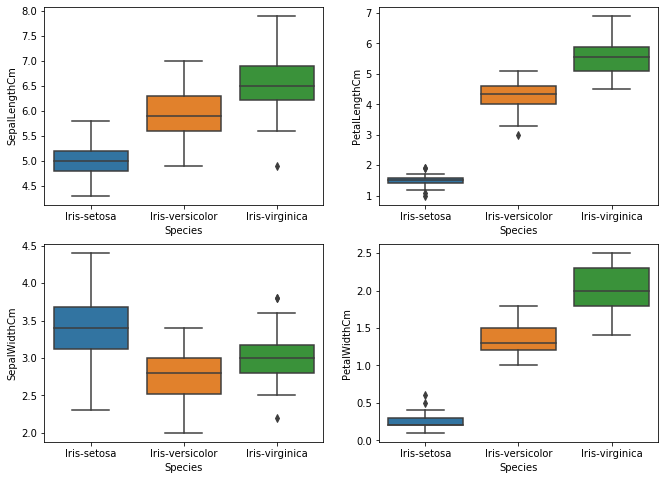

In [84]:
plt.figure(figsize=(11,8))
plt.subplot(2,2,1)
sns.boxplot(y=data['SepalLengthCm'],x=data['Species'],data=data)
plt.subplot(2,2,2)
sns.boxplot(y=data['PetalLengthCm'],x=data['Species'],data=data)
plt.subplot(2,2,3)
sns.boxplot(y=data['SepalWidthCm'],x=data['Species'],data=data)
plt.subplot(2,2,4)
sns.boxplot(y=data['PetalWidthCm'],x=data['Species'],data=data)

# Machine Learning Model

#### Train Test Split
#### Spliting data for Training and Testing where 'x' training data and 'y' is testing data

In [85]:
# spliting data for Training and Testing where 'x' training data and 'y' is testing data
x =data.iloc[ : , 1:5].values
y =data['Species']

In [86]:
#import required labrary and model in it
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30,random_state=3)

# Training and Predicting
### We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [87]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
KM = KMeans(n_clusters=3)
KM.fit(x)
labels = kmeans.labels_

In [88]:
print(KM.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [89]:
#it shows the X and Y coordinates of centroid
KM.cluster_centers_

array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [90]:
SSE= []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(x_train,y_train)
    SSE.append(kmeans.inertia_)

The elbow method is used to determine the optimal number of clusters in K-means clustering. The elbow method plots the value of the cost function produced by different values of K. 


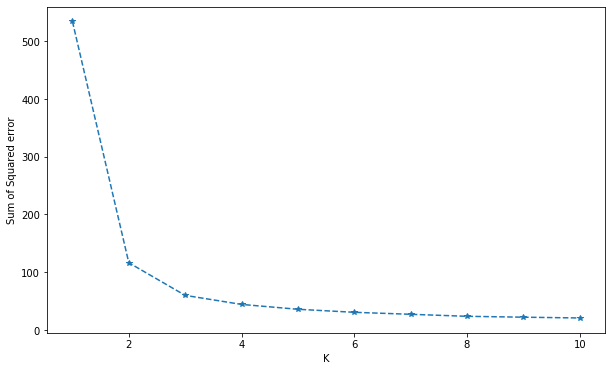

In [91]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),SSE,'*--')
plt.xlabel('K')
plt.ylabel('Sum of Squared error')
print("The elbow method is used to determine the optimal number of clusters in K-means clustering. The elbow method plots the value of the cost function produced by different values of K. ")

# Visualising the clusters

In [92]:
Y_predict = kmeans.fit_predict(x)

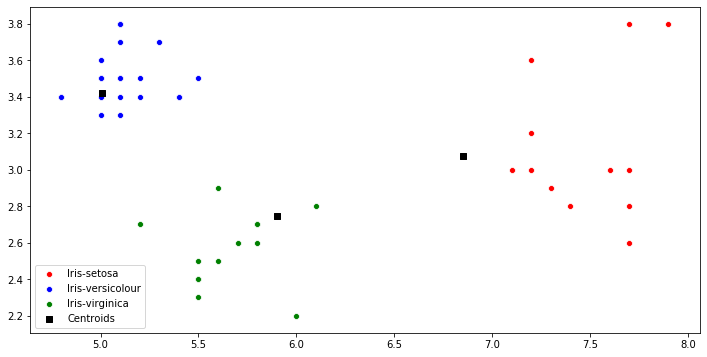

In [93]:
plt.figure(figsize=(12,6))
sns.scatterplot(x[Y_predict == 0, 0], x[Y_predict == 0, 1],color = 'red', label = 'Iris-setosa')
sns.scatterplot(x[Y_predict == 1, 0], x[Y_predict == 1, 1],color = 'blue', label = 'Iris-versicolour')
sns.scatterplot(x[Y_predict == 2, 0], x[Y_predict == 2, 1],color = 'green', label = 'Iris-virginica')         

# Plotting the centroids of the clusters
plt.scatter(KM.cluster_centers_[:, 0],KM.cluster_centers_[:,1],marker='s' ,color = 'black', label = 'Centroids')
plt.legend()
